In [2]:
import pandas as pd# which is used for for handling and analyzing data or it is mainly used for structured data 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
# If you saved as Excel
# df = pd.read_excel("HR_data.xlsx")

# If CSV (from Kaggle)
df = pd.read_csv("HR-Employee-Attrition.csv")
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Check missing values
print(df.isnull().sum())

# Label encode Attrition (Yes = 1, No = 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label encode other categorical columns
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

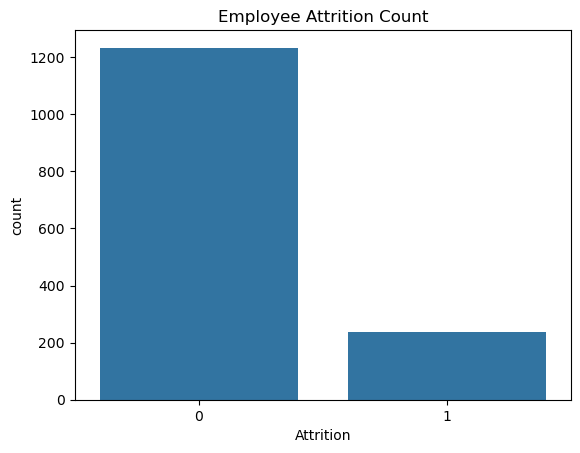

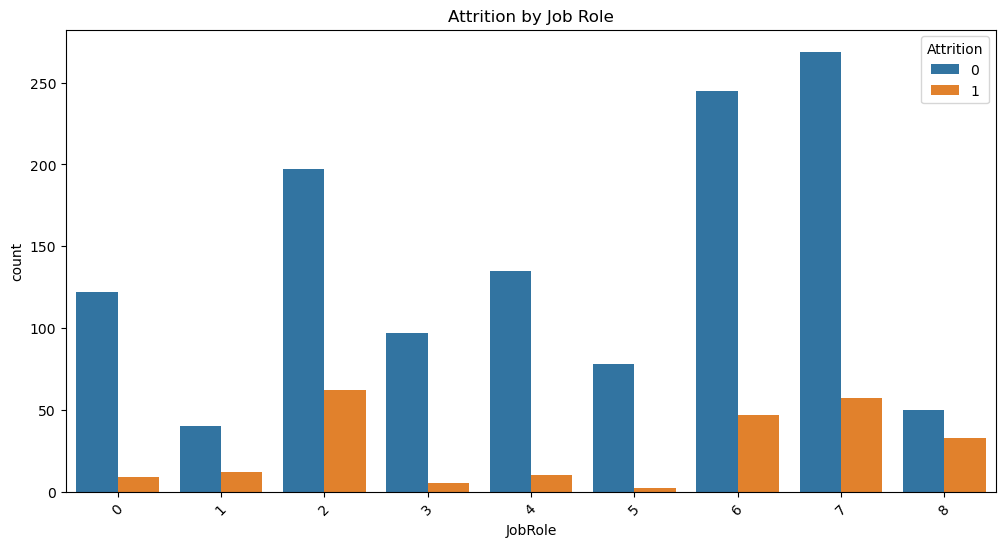

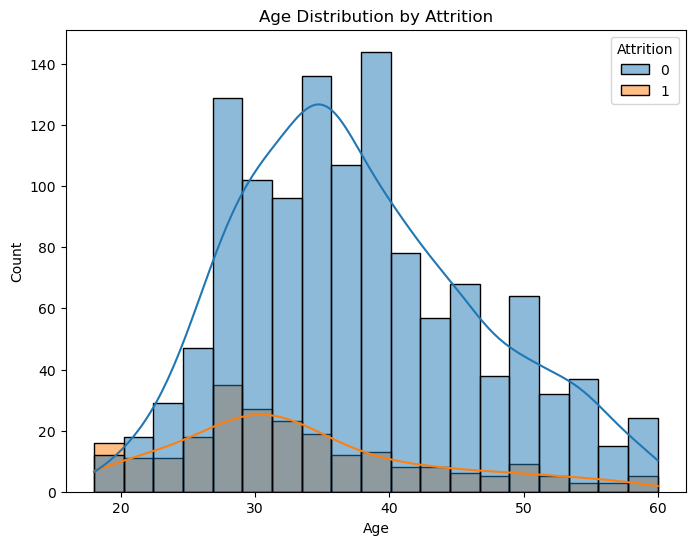

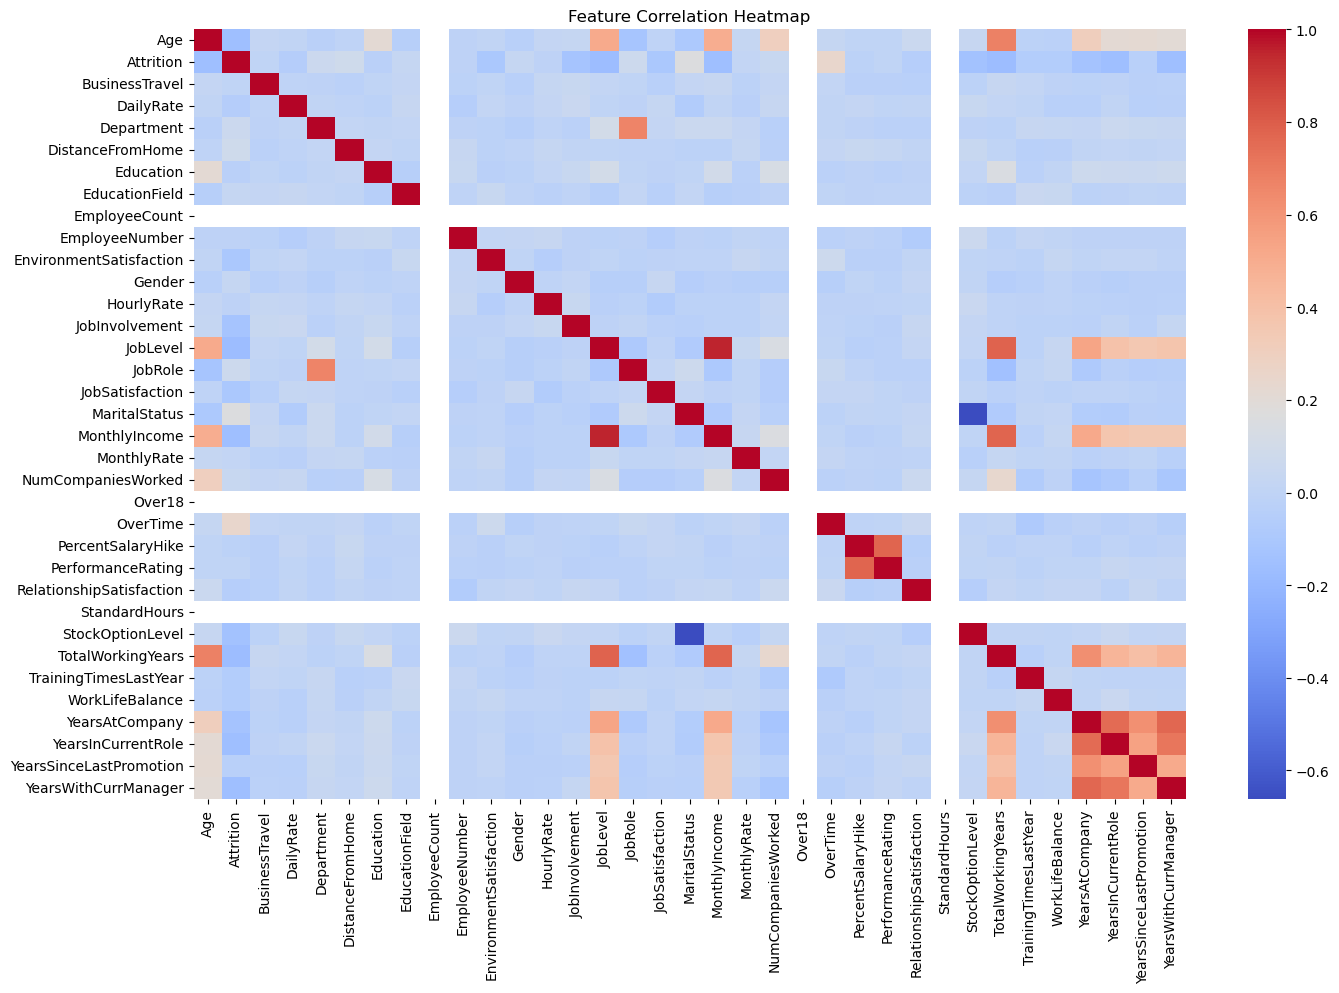

In [8]:
# Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

# Job Role vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

# Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title("Age Distribution by Attrition")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Feature selection
X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)
y = df['Attrition']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[254   1]
 [ 34   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



In [5]:
# Save cleaned dataset
df.to_excel("Cleaned_HR_Data.xlsx", index=False)

# Optional: Save predictions
output = X_test.copy()
output['Actual Attrition'] = y_test
output['Predicted Attrition'] = y_pred
output.to_excel("Attrition_Predictions.xlsx", index=False)

NameError: name 'X_test' is not defined